In [20]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,LSTM,Bidirectional
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical

In [21]:
(x_train,y_train1),(x_test,y_test1) = fashion_mnist.load_data()
x_train = x_train.reshape(60000,28,28).astype('float32')/255
x_test= x_test.reshape(10000,28,28).astype('float32')/255


In [22]:
y_train = to_categorical(y_train1)
y_test = to_categorical(y_test1)
y_test

array([[0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [23]:
input_shape = (28, 28)
inputs = Input(shape = input_shape)
ls = Bidirectional(LSTM(128))(inputs)
output = Dense(10,activation = 'softmax')(ls)
model = tf.keras.Model(inputs = inputs,outputs = output)

In [24]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 bidirectional (Bidirection  (None, 256)               160768    
 al)                                                             
                                                                 
 dense_1 (Dense)             (None, 10)                2570      
                                                                 
Total params: 163338 (638.04 KB)
Trainable params: 163338 (638.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',loss = 'categorical_crossentropy',metrics = ['accuracy'])

In [26]:
history = model.fit(x_train,y_train,validation_split=.1,epochs = 15)

Epoch 1/15
1688/1688 [==============================] - 17s 8ms/step - loss: 0.5430 - accuracy: 0.7998 - val_loss: 0.4467 - val_accuracy: 0.8373
Epoch 2/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3935 - accuracy: 0.8546 - val_loss: 0.3601 - val_accuracy: 0.8663
Epoch 3/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.3511 - accuracy: 0.8708 - val_loss: 0.3566 - val_accuracy: 0.8645
Epoch 4/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.3236 - accuracy: 0.8807 - val_loss: 0.3285 - val_accuracy: 0.8743
Epoch 5/15
1688/1688 [==============================] - 14s 8ms/step - loss: 0.3019 - accuracy: 0.8882 - val_loss: 0.3071 - val_accuracy: 0.8863
Epoch 6/15
1688/1688 [==============================] - 12s 7ms/step - loss: 0.2847 - accuracy: 0.8941 - val_loss: 0.2920 - val_accuracy: 0.8867
Epoch 7/15
1688/1688 [==============================] - 13s 7ms/step - loss: 0.2693 - accuracy: 0.8989 - val_loss: 0.2953 - val_ac

Text(0, 0.5, 'accuracy')

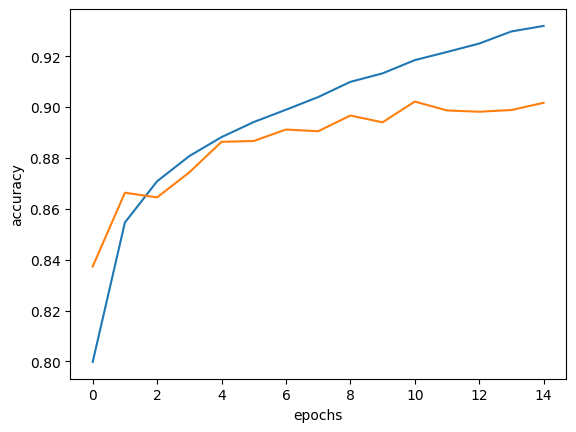

In [27]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.xlabel('epochs')
plt.ylabel('accuracy')

In [28]:
import numpy as np
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred,axis =1)
y_pred

313/313 [==============================] - 1s 3ms/step


array([9, 2, 1, ..., 8, 1, 5])

In [29]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred,y_test1)

0.8985